In [ ]:
# Neural network (you do not have to do anything in this cell)

# import the libraries that we will need
from sklearn.datasets import fetch_openml  # !!! make sure you check out                                           
import numpy as np                         # openml.org for more datasets!
import matplotlib.pyplot as plt
%matplotlib inline

# Now we load the MNIST dataset using openml
mnist = fetch_openml('mnist_784', cache=False)  # !!! make sure you check out
                                                # openml.org for more datasets!
X = mnist.data
y = mnist.target

# let's normalize X so that all values are between zero and one
X = X/np.max(X)

# let's convert y into a sparse matrix
Ndatapoints = y.shape[0]
Nlabels = len(np.unique(y))
y_sparse = np.zeros([Ndatapoints, Nlabels])
for i in range(Ndatapoints):
  y_sparse[i,int(y[i])] = 1
y = y_sparse

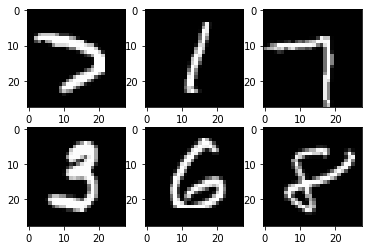

In [ ]:
# now we split the data (you do not have to do anything in this cell)

# because we want to use cross validation, 
# we randomly select 10% as test, 10% as validation, and 80% as training
Ntotal = X.shape[0]
Ntest_val = int(Ntotal/5)
Nval = Ntest_val/2
Ntrain = Ntotal - Ntest_val

# now let's generate the indices for the test and val
test_val_idx = np.random.choice(range(Ntotal),Ntest_val,replace=False)
test_idx = test_val_idx[:int(Ntest_val/2)]
val_idx = test_val_idx[int(Ntest_val/2):]

X_ts = X[test_idx]
y_ts = y[test_idx]
X_vl = X[val_idx]
y_vl = y[val_idx]
X_tr = np.delete(X, test_val_idx, axis=0)
y_tr = np.delete(y, test_val_idx, axis=0)

# we forget about the testing data for now

# let's visualize six examples in the training set
Nexamples = 6
example_idxs = np.random.choice(Ntrain,Nexamples,replace=False)
for i, iexample in enumerate(example_idxs):
  plt.subplot(2,3,i+1)
  plt.imshow(np.reshape(X_tr[iexample],[28,28]),cmap='gray')
plt.show()

In [ ]:
# some variables that we will need
Ntrain = X_tr.shape[0]
Nfeatures = X_tr.shape[1]
Nclasses = y_sparse.shape[1]
Nval = X_vl.shape[0]

# the number of "neurons" in the hidden layer
Nhidden1 = 16

# initialize the parameters that we will train
W_1 = np.random.uniform(0.0, 1.0, size = (Nfeatures, Nclasses))
b_1 = np.zeros(Nclasses)
W_o = np.random.uniform(0.0, 1.0, size = (Nfeatures, Nclasses))
b_o = np.zeros(Nclasses)

def f1(h1_raw): 
  result = h1_raw
  return result

def softmax (tetta):
  result = tetta
 
  for iscore in range(tetta.shape[0]):
    isum = sum(np.exp(tetta[iscore,:]))
 
    for i in range(tetta.shape[1]):
      result[iscore, i] = np.exp(tetta[iscore, i]) / isum
  return result

# now we can get y_hat for the training data
scores = np.dot(X_tr, W_1) + b_1
h1_tr = f1(scores) * W_o
y_hat = softmax(h1_tr + b_o)

# define the learning rate
learning_rate = 0.001
reg_str = pow(W, 2)

# now we put everything in a for loop, so that we can repeat the process
Niters = 1000

for iter in range(Niters):
  ###################################
  ### Neural Network Forward Pass ###
  ###################################
  # calculate the y_hat with the slope and bias values
  # for the training set
  scores = np.dot(X_tr, W_1) + b_1
  h1_tr = f1(scores) * W_o
  y_hat = softmax(h1_tr + b_o)
  # and also the cost function  
  J = (1 / Ntrain) * sum((y_tr) * np.log(y_hat)) 
  
  # now do the same for the validation set
  scores = np.dot(X_vl, W_1) + b_1
  h1_vl = f1(scores) * W_o
  y_hat_vl = softmax(h1_tr + b_o)
  # and also the cost function
  J_vl = (1 / Nval) * sum((y_vl) * np.log(y_hat)) 
  
  ####################################
  ### Neural Network Backward Pass ###
  #################################### 
  # update the bias and weights
  dJdscores = y_hat - y_tr
  dJdh1 = 
  dJdh1raw = 
  dJdb_o = np.dot(np.ones((1, Ntrain)), (dJdscores))
  dJdW_o = (1 / Ntrain) * np.dot(np.transpose(X_tr), (dJdscores))
  dJdb_1 = np.dot(np.ones((1, Ntrain)), (dJdscores))
  dJdW_1 = (1 / Ntrain) * np.dot(np.transpose(X_tr), (dJdscores))
  b_o = b_o - learning_rate*dJdb_o
  W_o = W_o - learning_rate*dJdW_o
  b_1 = b_1 - learning_rate*dJdb_1
  W_1 = W_1 - learning_rate*dJdW_1

  print('At iteration No. ' + str(iter) + ' ,the cross-entropy (training) cost is: ', J)
  print('------------------------------ the cross-entropy (validation) cost is: ', J_vl)

In [ ]:
# now let's visualize some of the weights in the first layer
for i in range(Nclasses):
  plt.subplot(2,5,i+1)
  plt.imshow(np.reshape(W_1[:,i],[28,28]),cmap='gray')
plt.show()

In [ ]:
# now we calculate the accuracy

y_hat_index = np.argmax(y_hat,axis=1)
y_hat_vl_index = np.argmax(y_hat_vl,axis=1)
y_tr_index = np.argmax(y_tr,axis=1)
y_vl_index = np.argmax(y_vl,axis=1)

print('The training accuracy is: ', np.sum(y_tr_index==y_hat_index)/Ntrain)
print('The validation accuracy is: ', np.sum(y_vl_index==y_hat_vl_index)/Nval)

In [ ]:
# more things to try:

# try different activation functions in different layers.

# implement L1 regularization

# add more layers to the neural network. 
# More layers usually results in better accuracy

# However, the more layers you add, the slower the neural network
# will train. How can you speed up your network?

# Get the best validation accuracy by trying out different learning rate
# regularization strength, initial conditions for bias and Weight terms, 
# changing the statistics of the input

# can you bring the training accuracy to 100%? If you do everything right
# and you do not worry about the validation accuracy, you should be able to
# bring the training accuracy to 100% and the training cost very close to 0
# hint: you will have to change the size of the training set to do this

# what is happening when you bring the training accuracy to 100%? 
# What happened to the validation accuracy? Can you bring both the training 
# and validation accuracy to 100%?

# how do you know when to stop your training? define a rule to stop your
# training, and substitute the for loop for a while loop

# once you find the absolue best model, check the test accuracy. 
# do this only once. Doing it more than one time is bad practice and makes
# your cross-validation efforts useless.